In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
A=pd.read_csv('Concrete_Data.csv')
A.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

 # If we go Linear model try performing Levene Test FOr Two cols at a TIme
# it might Return High Bias Error,prefer Non linear Model 
A=pd.read_csv('/content/drive/My Drive/Case Studies Mahesh Anand/Concrete_Data.csv')
A.columns

In [13]:
A.columns=['CC','BFS','FA','WC','SPC','CA','FAC','Age','CCS']
A.columns

Index(['CC', 'BFS', 'FA', 'WC', 'SPC', 'CA', 'FAC', 'Age', 'CCS'], dtype='object')

In [14]:
A.head()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [15]:
A.var()

CC     10921.580220
BFS     7444.124812
FA      4095.616541
WC       456.002651
SPC       35.686781
CA      6045.677357
FAC     6428.187792
Age     3990.437729
CCS      279.081814
dtype: float64

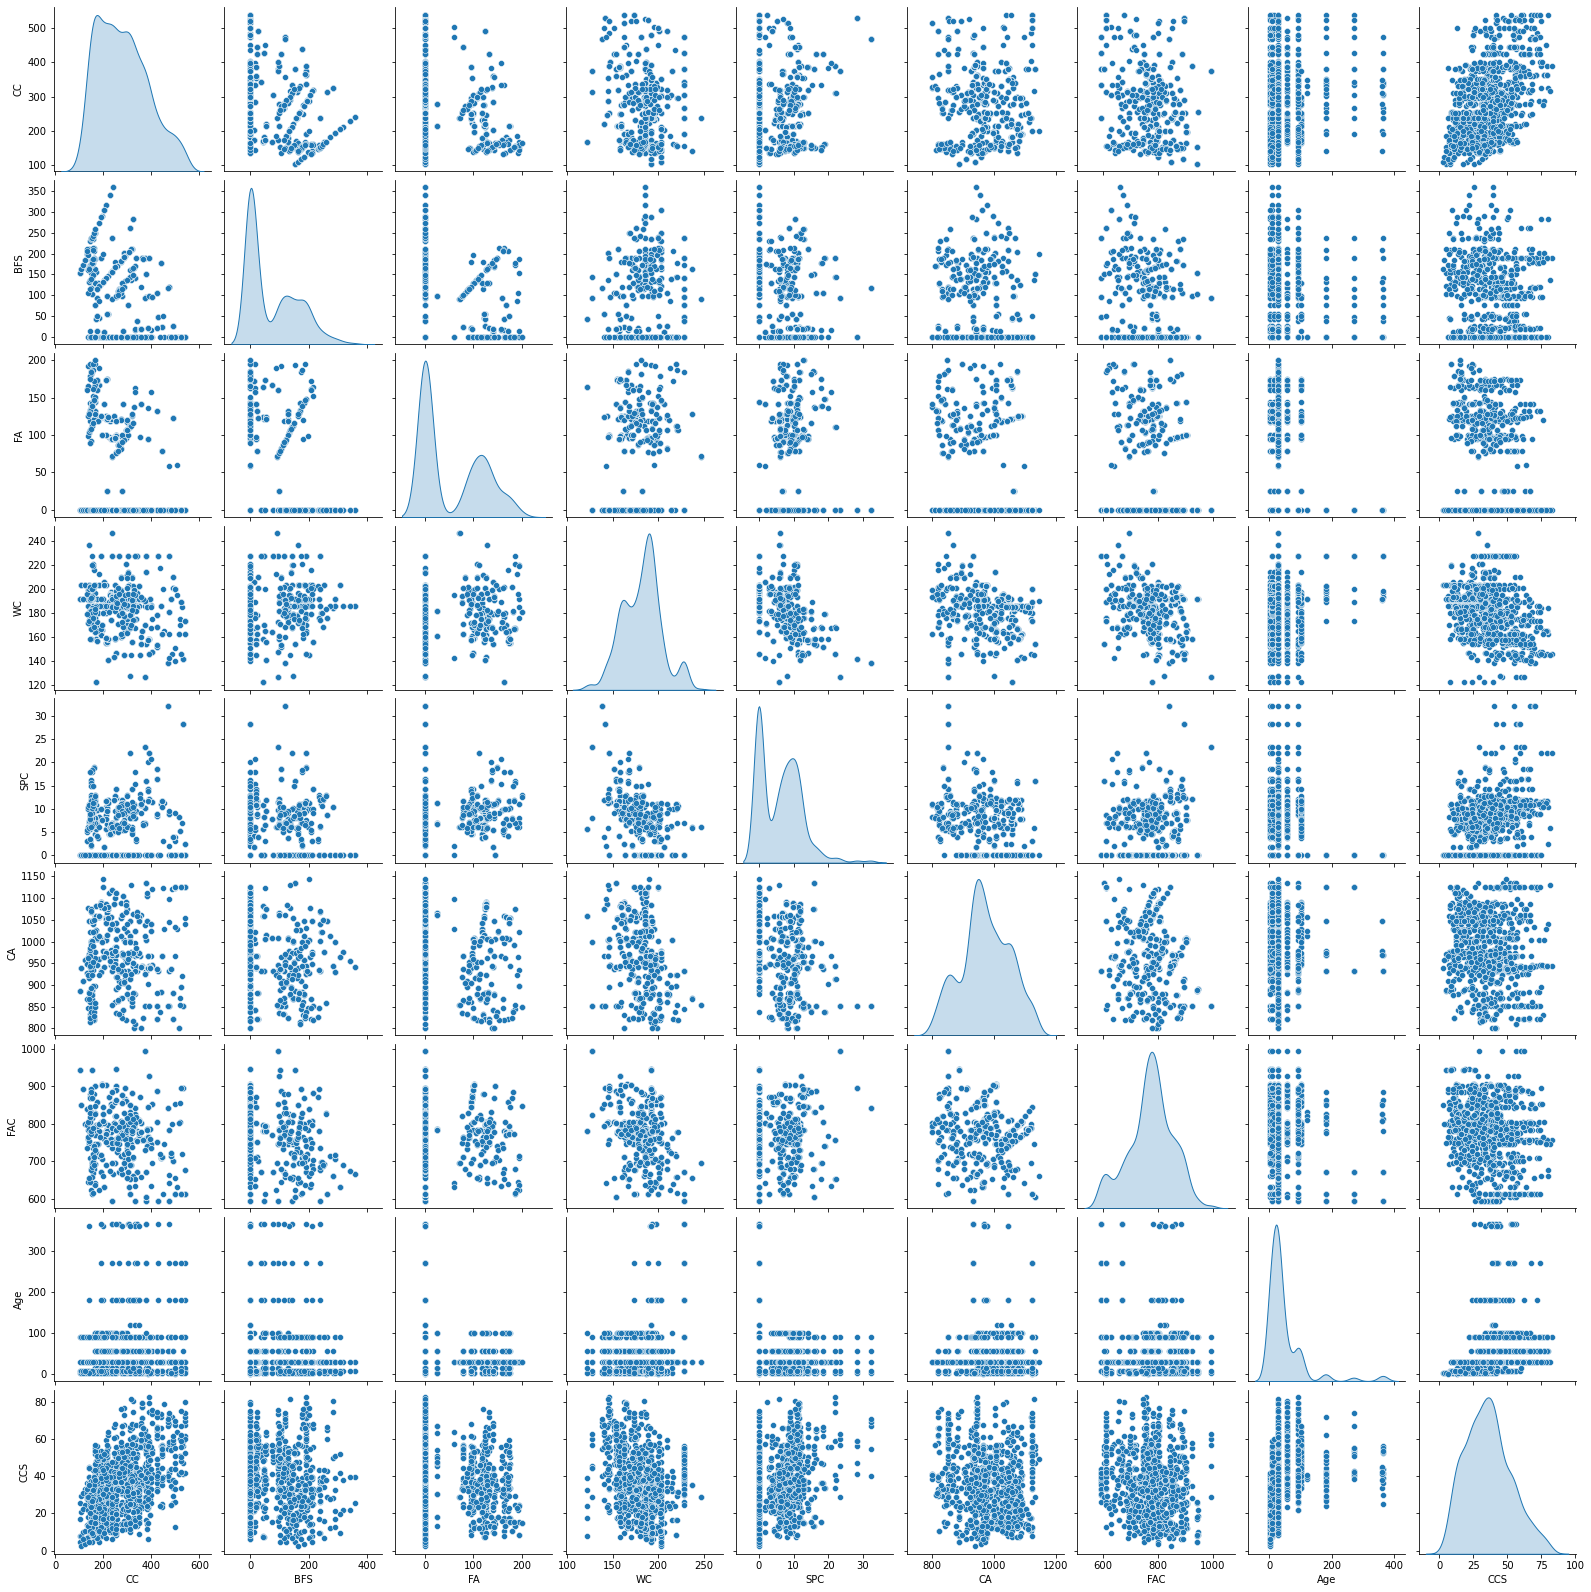

In [16]:
sns.pairplot(A,diag_kind='kde')

In [17]:
A.corr()
# CCS is the depandant Variable (here in this table it indicates the Corr value is less than 0.05)
# hence prefer Linear model
# Dont waste time creating Linear model

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [18]:
from scipy.stats import levene

In [19]:
levene(A['FA'],A['CCS'])

LeveneResult(statistic=407.83846547932365, pvalue=6.895004041513094e-83)

In [20]:
levene(A['CA'],A['CCS'])

LeveneResult(statistic=1102.664217424037, pvalue=5.4549852696796274e-194)

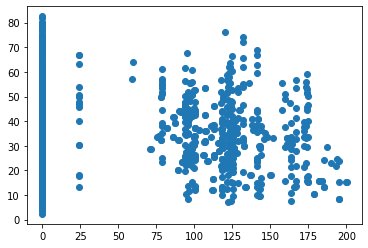

In [21]:
plt.scatter(A['FA'],A['CCS'])

In [22]:
A.corr()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [23]:
A.describe()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [24]:
X=A.drop('CCS',axis=1)
Y=A[['CCS']]

In [25]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [26]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(Y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['CC', 'BFS', 'FA', 'WC', 'SPC', 'Age']


In [27]:
X_LR=X[selected_features]

In [28]:
sc=StandardScaler()

In [29]:
X_LR_sc=sc.fit_transform(X_LR)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

In [31]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [32]:
LR=LinearRegression()

In [33]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
rmse=cross_val_score(LR,X_LR_sc,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error',np.mean(np.abs(rmse)))
print('Var_error',np.std(np.abs(rmse),ddof=1))

Bias_error 10.471674022352337
Var_error 0.6399834632262871


In [34]:
X_std=sc.fit_transform(X)

In [35]:
X_std.shape

(1030, 6)

In [36]:
knn=KNeighborsRegressor()

In [37]:
knn_params={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}

In [38]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [39]:

GS=GridSearchCV(knn,knn_params,cv=kf,scoring='neg_root_mean_squared_error')

In [40]:
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [41]:
GS.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [42]:
knn_tuned=KNeighborsRegressor(n_neighbors=6,weights='distance')

In [43]:
rmse=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error',np.mean(np.abs(rmse)))
print('Var_error',np.std(np.abs(rmse),ddof=1))

Bias_error 7.380745454494139
Var_error 0.21670235015297998


In [44]:
dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}

In [45]:
GS_dt=GridSearchCV(dt,dt_params,cv=kf,scoring='neg_root_mean_squared_error')

In [46]:
GS_dt.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_root_mean_squared_error')

In [47]:
GS_dt.best_params_ 

{'max_depth': 12, 'min_samples_leaf': 4}

In [48]:
dt_tuned=DecisionTreeRegressor(max_depth=17,min_samples_leaf=2,random_state=0)

In [49]:
rmse=cross_val_score(dt_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error',np.mean(np.abs(rmse)))
print('Var_error',np.std(np.abs(rmse),ddof=1))

Bias_error 6.808418521685304
Var_error 0.5249521009210792


In [50]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [51]:
#Tuning Random Forest Regressor
RF_be=[]
RF_ve=[]
for n in np.arange(1,100):
  RF=RandomForestRegressor(n_estimators=n,random_state=0)
  kf=KFold(n_splits=5,shuffle=True,random_state=0)
  scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
  RF_be.append(np.mean(np.abs(scores)))
  RF_ve.append(np.std(np.abs(scores)))


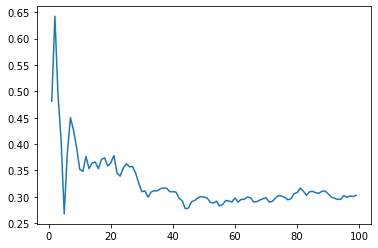

In [52]:
x_axis=np.arange(1,100)
plt.plot(x_axis,RF_ve)

In [53]:
np.min(RF_ve),np.argmin(RF_ve)

(0.26734862676730364, 4)

In [54]:
RF_tuned=RandomForestRegressor(n_estimators=87,random_state=0)
rmse=cross_val_score(RF_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error',np.mean(np.abs(rmse)))
print('Var_error',np.std(np.abs(rmse),ddof=1))

Bias_error 5.0142741500427945
Var_error 0.3425681705536195


In [55]:
GB=GradientBoostingRegressor(random_state=0)
params={'n_estimators':np.arange(1,300)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
GS=GridSearchCV(GB,params,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  7...
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299

In [56]:
GS.best_params_

{'n_estimators': 299}

In [ ]:
AB_RF=AdaBoostRegressor(base_estimator=RF_tuned,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
GS=GridSearchCV(AB_RF,params,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(X_std,Y)

In [ ]:
age=np.array([13,14,15,25,35,49,68,71,73])
e1_pred=np.array([19.25,19.25,19.25,57.2,19.25,57.2,57.2,57.2,57.2])
e2_pred=np.array([15.68,15.68,15.68,53.63,15.68,64.33,53.63,64.33,64.33])

In [ ]:
age-e1_pred

In [ ]:
age-e2_pred

In [ ]:
np.mean((age-e2_pred)**2)

In [ ]:
np.mean((age-np.mean(age))**2)

In [ ]:
GL=np.array([13,14,15,35])
np.mean(GL)

In [ ]:
np.mean((GL-np.mean(GL))**2)

In [ ]:
GR=np.array([25,49,68,71,73])
np.mean(GR)

In [ ]:
np.mean((GR-np.mean(GR))**2)

In [ ]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=6,weights='distance')
DT=DecisionTreeRegressor(max_depth=17,min_samples_leaf=2,random_state=0)
RF=RandomForestRegressor(n_estimators=87,random_state=0)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=75,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=800)
Vot_Reg = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])

In [ ]:
models = []
models.append(('MVLR', LR))
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoostRegressor',GBoost))
models.append(('VotingRegressor',Vot_Reg))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,
	                                  cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results))) #for ploting purpose
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
	                       np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
((4.201149-4.178575)/4.201149)*100

In [ ]:
((0.256543-0.242509)/0.256543)*100

In [ ]:
((4.222697-4.173315)/4.222697)*100

In [ ]:
((0.238453-0.208947)/0.238453)*100

In [ ]:
((0.238453-0.205925)/0.238453)*100

In [ ]:
((4.906368- 4.173315)/4.906368)*100

In [ ]:
(0.365324-0.341762)/0.365324

In [ ]:
GBoost.fit(X_train,Y_train)

In [ ]:
y_pred=GBoost.predict(X_prod)

In [ ]:
y_pred[:5]

In [ ]:
Y_true[:5]

In [ ]:
plt.plot(Y_true,y_pred,'*')

In [ ]:
Y_pred=pd.DataFrame(y_pred)

In [ ]:
idx=np.arange(len(y_pred))
idx

In [ ]:
Y_pred.index=idx
Y_true.index=idx

In [ ]:
np.corrcoef(Y_true['CCS'],Y_pred[0])

In [ ]:
0.9857227*0.9857227